# Import Dependencies

In [1]:
# import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [5]:
os.chdir(r'C:\Users\ASUS\OneDrive\Desktop\Projects\Face Recognition')

# Set GPU Growth

In [4]:
# # Avoid out of memory problem by setting GPU memory consumption growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
#len(gpus)

# Create Folder Structure

In [7]:
# setup path
BASE_PATH = r"C:\Users\ASUS\OneDrive\Desktop\Projects\Face Recognition"

# Define the 'data' folder paths
DATA_PATH = os.path.join(BASE_PATH, 'data')
POS_PATH = os.path.join(DATA_PATH, 'positive')
NEG_PATH = os.path.join(DATA_PATH, 'negative')
ANC_PATH = os.path.join(DATA_PATH, 'anchor')

In [9]:
# make directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\ASUS\\OneDrive\\Desktop\\Projects\\Face Recognition\\data\\positive'

# Collect Positives and Anchors

In [11]:
# Move LFW Images into the following repository data/negative

for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'lfw'

# Collect Positive and Anchor Classes 

In [11]:
# Import uuid library to generate unique image names
import uuid # (Univarsal Unique Identifier)

In [13]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    # Cut down frame to 250X250 px
    frame = frame[80:220+250,:250+250,:]

    # Collect anchors
    if(cv2.waitKey(1) & 0XFF == ord('a')):
        # Create the unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # write out anchor image
        cv2.imwrite(imgname, frame)
    # Collect Positives
    if(cv2.waitKey(1) & 0XFF == ord('p')):
        # Create the unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # write out anchor image
        cv2.imwrite(imgname, frame)
        
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    # Breaking gracefully 
    if(cv2.waitKey(1) & 0XFF == ord('q')):
        break

# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

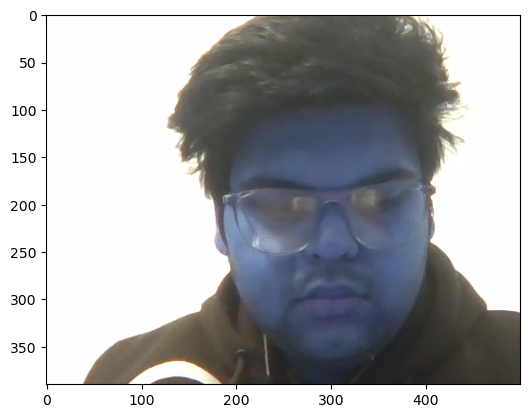

In [15]:
plt.imshow(frame)

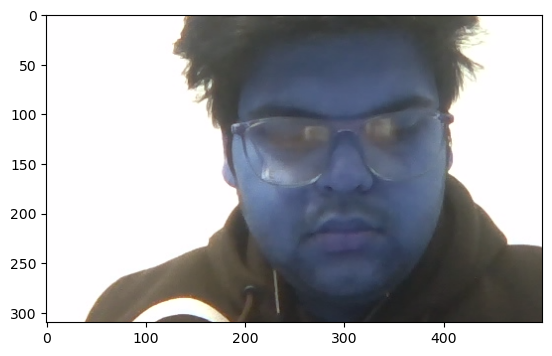

In [17]:
plt.imshow(frame[80:220+250,:250+250,:])

# Data Augmentation

In [19]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size(20,20,3),seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100), np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90,max_jpeg_quality=100, seed=(np.random.randint(100), np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9, upper=1, seed=(np.random.randint(100), np.random.randint(100)))
        data.append(img)
    return data

In [291]:
img_path = os.path.join(POS_PATH, 'ad1c11d0-cd9c-11ef-9cd7-1cce51b8bb39.jpg')
img = cv2.imread(img_path)
augmented_images = data_aug(img)

for image in augmented_images:
    cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [293]:
for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img)
    for image in augmented_images:
        cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

# Load and Preprocess Images

## Get Image Directories

In [21]:
# Paths
BASE_PATH = r"C:\Users\ASUS\OneDrive\Desktop\Projects\Face Recognition"
ANC_PATH = os.path.join(BASE_PATH, 'data', 'anchor')
POS_PATH = os.path.join(BASE_PATH, 'data', 'positive')
NEG_PATH = os.path.join(BASE_PATH, 'data', 'negative')

# Create TensorFlow datasets
anchor = tf.data.Dataset.list_files(os.path.join(ANC_PATH, '*.jpg')).take(1000)
positive = tf.data.Dataset.list_files(os.path.join(POS_PATH, '*.jpg')).take(1000)
negative = tf.data.Dataset.list_files(os.path.join(NEG_PATH, '*.jpg')).take(1000)

In [23]:
dir_test = anchor.as_numpy_iterator()

In [25]:
dir_test.next()

b'C:\\Users\\ASUS\\OneDrive\\Desktop\\Projects\\Face Recognition\\data\\anchor\\f68ef9e2-cf7d-11ef-8785-1cce51b8bb39.jpg'

## Preprocessing - Scale and Resize

In [27]:
def preprocess(file_path):
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img,(100,100))
    # scale image to be in between 0 to 1
    img = img/255.0
    # return image
    return img

In [29]:
img = preprocess('C:\\Users\\ASUS\\OneDrive\\Desktop\\Projects\\Face Recognition\\data\\anchor\\dc9af6c1-cb87-11ef-95f0-e9f4f1bd643b.jpg')

In [31]:
img.numpy().max()

1.0

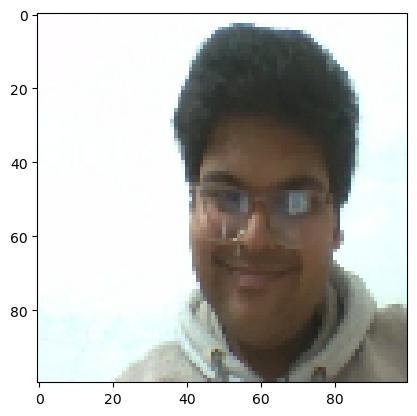

In [33]:
plt.imshow(img)

## Create Labelled Dataset

In [35]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 1,1,1,1,1

In [35]:
positives = tf.data.Dataset.zip((anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [37]:
samples = data.as_numpy_iterator()

In [39]:
examples = samples.next()

In [41]:
examples

(b'C:\\Users\\ASUS\\OneDrive\\Desktop\\Projects\\Face Recognition\\data\\anchor\\bfd6761e-cf7d-11ef-a6df-1cce51b8bb39.jpg',
 b'C:\\Users\\ASUS\\OneDrive\\Desktop\\Projects\\Face Recognition\\data\\positive\\ebc5edc9-cb87-11ef-a9f6-e9f4f1bd643b.jpg',
 1.0)

## Build Train and Test Partition

In [43]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img),preprocess(validation_img),label)

In [45]:
res = preprocess_twin(*examples)

In [47]:
res[2]

1.0

In [49]:
# Build data loader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [51]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [53]:
# Training Partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [55]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [57]:
train_samples = train_data.as_numpy_iterator()

In [59]:
train_sample = train_samples.next()

In [61]:
len(train_sample[0])

16

In [63]:
round(len(data)*.3)

426

In [65]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*0.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Model Engineering

## Build Embedding Layer

In [67]:
inp = Input(shape=(100,100,3),name = "input_image")

In [69]:
inp

<KerasTensor shape=(None, 100, 100, 3), dtype=float32, sparse=False, name=input_image>

In [71]:
c1 = Conv2D(64,(10,10),activation='relu')(inp)

In [73]:
c1

<KerasTensor shape=(None, 91, 91, 64), dtype=float32, sparse=False, name=keras_tensor>

In [75]:
m1 = MaxPooling2D(64,(2,2),padding='same')(c1)

In [77]:
 m1

<KerasTensor shape=(None, 46, 46, 64), dtype=float32, sparse=False, name=keras_tensor_1>

In [79]:
c2 = Conv2D(128,(7,7),activation='relu')(m1)
m2 = MaxPooling2D(64,(2,2),padding = 'same')(c2)

In [81]:
c2

<KerasTensor shape=(None, 40, 40, 128), dtype=float32, sparse=False, name=keras_tensor_2>

In [83]:
m2

<KerasTensor shape=(None, 20, 20, 128), dtype=float32, sparse=False, name=keras_tensor_3>

In [85]:
c3 = Conv2D(128,(4,4),activation='relu')(m2)
m3 = MaxPooling2D(64,(2,2),padding='same')(c3)

In [87]:
c3

<KerasTensor shape=(None, 17, 17, 128), dtype=float32, sparse=False, name=keras_tensor_4>

In [89]:
m3

<KerasTensor shape=(None, 9, 9, 128), dtype=float32, sparse=False, name=keras_tensor_5>

In [91]:
c4 = Conv2D(256,(4,4),activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096,activation='sigmoid')(f1)

In [93]:
c4

<KerasTensor shape=(None, 6, 6, 256), dtype=float32, sparse=False, name=keras_tensor_6>

In [95]:
f1

<KerasTensor shape=(None, 9216), dtype=float32, sparse=False, name=keras_tensor_7>

In [97]:
d1

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_8>

In [99]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [101]:
mod.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
def make_embedding():
    inp = Input(shape=(100,100,3),name = "input_image")

    # First Block
    c1 = Conv2D(64,(10,10),activation='relu')(inp)
    m1 = MaxPooling2D(64,(2,2),padding='same')(c1)
    # Second Block
    c2 = Conv2D(128,(7,7),activation='relu')(m1)
    m2 = MaxPooling2D(64,(2,2),padding = 'same')(c2)

    # Third Block
    c3 = Conv2D(128,(4,4),activation='relu')(m2)
    m3 = MaxPooling2D(64,(2,2),padding='same')(c3)

    # Final embedding Block
    c4 = Conv2D(256,(4,4),activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096,activation='sigmoid')(f1)
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [105]:
embedding = make_embedding()

In [107]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

## Build Distance Layer

In [109]:
# Siamese Distance Class
class L1Dist(Layer):
    # Init method - Inheritance
    def __init__(self,**kwargs):
        super().__init__()
    # Similarity Calculation
    def call(self, input_embedding, validation_embedding):
        input_embedding = tf.convert_to_tensor(input_embedding)
        validation_embedding = tf.convert_to_tensor(validation_embedding)
        return tf.math.abs(input_embedding - validation_embedding)

In [111]:
l1 = L1Dist()

In [113]:
# Remove arguments and brackets in case face errors 
l1(anchor_embedding, validation_embeddin)

NameError: name 'anchor_embedding' is not defined

## Make Siamese Model

In [115]:
input_image = Input(name = 'input_img',shape=(100,100,3))
validation_image = Input(name='validation_img',shape=(100,100,3))

In [117]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [119]:
inp_embedding

[<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_18>]

In [121]:
val_embedding

[<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_19>]

In [123]:
siamese_layer = L1Dist()

In [125]:
distances = siamese_layer(inp_embedding, val_embedding)

In [127]:
classifier = Dense(1,activation='sigmoid')(distances)

In [129]:
classifier

<KerasTensor shape=(1, None, 1), dtype=float32, sparse=False, name=keras_tensor_21>

In [131]:
siamese_network = Model(inputs=[input_image,validation_image],outputs=classifier, name='SiameseNetwork')

In [133]:
siamese_network

<Functional name=SiameseNetwork, built=True>

In [135]:
siamese_network.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_1 (L1Dist)            │ (1, None, 4096)           │               0 │ embedding[0][0],           │
│                               │                           │                 │ embedding[1][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (1, None, 1)              │           4,097 │ l1_dist_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [137]:
def make_siamese_model():
    # Anchor image in the network
    input_image = Input(name = 'input_img',shape=(100,100,3))
    # Validation image in the network
    validation_image = Input(name='validation_img',shape=(100,100,3))
    # Combine siamese distance model
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image),embedding(validation_image))
    # Classification Layer
    classifier = Dense(1,activation='sigmoid')(distances)
    return Model(inputs = [input_image, validation_image],outputs=classifier,name='SiameseNetwork')

In [139]:
siamese_model = make_siamese_model()

In [141]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_2 (L1Dist)            │ (1, None, 4096)           │               0 │ embedding[2][0],           │
│                               │                           │                 │ embedding[3][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (1, None, 1)              │           4,097 │ l1_dist_2[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# Training

## Setup Loss and Optimizer

In [144]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [146]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## Establish Checkpoints

In [148]:
checkpoint_dir = r'C:\Users\ASUS\OneDrive\Desktop\Projects\Face Recognition\training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir,'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt,siamese_model=siamese_model)

## Build Train Step Function

In [150]:
test_batch = train_data.as_numpy_iterator()

In [152]:
batch_1 = test_batch.next()

In [154]:
x = batch_1[:2]

In [156]:
np.array(x).shape

(2, 16, 100, 100, 3)

In [158]:
y = batch_1[2]

In [160]:
y

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.],
      dtype=float32)

In [162]:
@tf.function
def train_step(batch):

    # Record all of our operations
    with tf.GradientTape() as tape:
        # Get anchor and poditive/negative image
        x = batch[:2]
        # Get label
        y = batch[2]

        # Forward pass
        yhat = siamese_model(x,training=True)
        y = tf.reshape(y, tf.shape(yhat))
        # Calculate Loss
        loss = binary_cross_loss(y,yhat)
    print(loss)        
    # Calculate gradients 
    grad = tape.gradient(loss,siamese_model.trainable_variables)
    # Calculate updated weights and apply to siamese model 
    opt.apply_gradients(zip(grad,siamese_model.trainable_variables))
    # Return loss
    return loss

## Build Training Loop

In [164]:
from tensorflow.keras.metrics import Precision, Recall

In [166]:
def train(data, EPOCHS):
    # Looop through epochs
    for epoch in range(1,EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch,EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))

        # Creating a metric object
        r = Recall()
        p = Precision()
        
        #Loop through each batch
        for idx,batch in enumerate(data):
            #Run train step here 
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2],yhat)
            p.update_state(batch[2],yhat)
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(),p.result().numpy())
        # Save Checkpoints
        if epoch%10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

## Train The Model

In [168]:
EPOCHS = 5

In [170]:
train(train_data,EPOCHS)


 Epoch 1/5


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_img', 'validation_img']. Received: the structure of inputs=('*', '*')
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_image']. Received: the structure of inputs=*
  warnings.warn(


Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step
1/1 ━━━━━━━━━━━

# Evaluate Model

## Import Metrics

In [172]:
# Import metric Calculations
from tensorflow.keras.metrics import Precision, Recall

## Make Predictions

In [174]:
# Get a batch of Test Data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [176]:
# Make Predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


array([[[9.9931943e-01],
        [9.9983525e-01],
        [6.7632300e-01],
        [2.6766749e-08],
        [8.4599688e-11],
        [3.1239942e-08],
        [2.8235996e-07],
        [9.9978733e-01],
        [9.9974400e-01],
        [9.9982256e-01],
        [8.6163645e-08],
        [3.9533706e-08],
        [7.6445482e-12],
        [9.9992603e-01],
        [4.2443879e-10],
        [1.6656641e-10]]], dtype=float32)

In [178]:
# Flatten and apply the operation
result = (np.array(y_hat).ravel() > 0.5).astype(int)

In [180]:
result_list = result.tolist()
result_list

[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]

In [182]:
y_true

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

## Calculate Matrix

In [184]:
# Generating metric object
m = Recall()
# Calculating recall value
m.update_state(y_true, y_hat)
# Return recall result 
m.result().numpy()

1.0

## Visualize Results

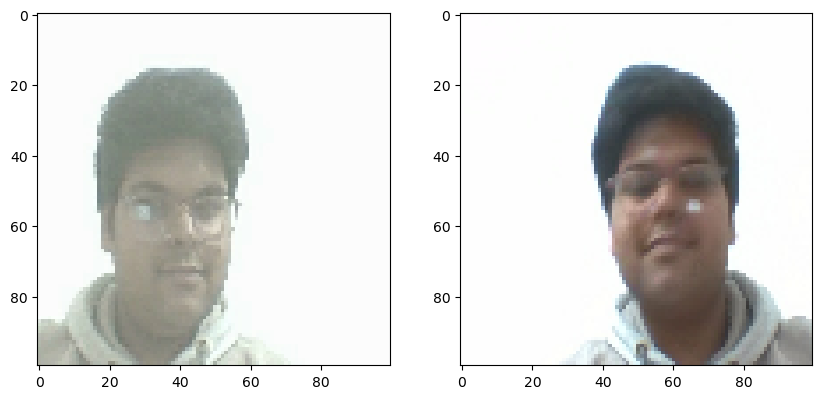

In [186]:
# Set Plot Size
plt.figure(figsize=(10,8))
# Set First Subplot
plt.subplot(1,2,1)
plt.imshow(test_input[1])
# Set Second Subplot
plt.subplot(1,2,2)
plt.imshow(test_val[1])
# Renders Cleanly
plt.show()

# Save Model

In [188]:
# Save weights 
siamese_model.save('siamesemodelv2.h5')

In [190]:
# Reload model 
model = tf.keras.models.load_model('siamesemodelv2.h5',custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [192]:
L1Dist

__main__.L1Dist

In [194]:
# Make Predictions woth reloaded model
model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step


array([[[9.9931943e-01],
        [9.9983525e-01],
        [6.7632300e-01],
        [2.6766749e-08],
        [8.4599688e-11],
        [3.1239942e-08],
        [2.8235996e-07],
        [9.9978733e-01],
        [9.9974400e-01],
        [9.9982256e-01],
        [8.6163645e-08],
        [3.9533706e-08],
        [7.6445482e-12],
        [9.9992603e-01],
        [4.2443879e-10],
        [1.6656641e-10]]], dtype=float32)

In [196]:
# View Model Summary
model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_3 (L1Dist)            │ (1, None, 4096)           │               0 │ embedding[0][0],           │
│                               │                           │                 │ embedding[1][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (1, None, 1)              │           4,097 │ l1_dist_3[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# Real Time Test

## Verification Function

In [198]:
def verify(model, detection_threshold, verification_threshold):
    # Build result array
    results = []
    for image in os.listdir(os.path.join('application_data','verification_images')):
        input_img = preprocess(os.path.join('application_data','input_image','input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data','verification_images',image))


        # Make Predictions
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis = 1)))
        results.append(result)

    # Detection Threshold: matric above which a prediction is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    # verification_threshold: proportion of a positive prediction / total positive samples
    verification = detection/len(os.listdir(os.path.join('application_data','verification_images')))
    verified = verification > verification_threshold

    return results, verified

## OpenCV Real Time Verification

In [200]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    # Cut down frame to 250X250 px
    frame = frame[120:180+250,200:250+250,:]

    # Verification Trigger
    if(cv2.waitKey(10) & 0xFF == ord('v')):
        # Save input image to application_data/input_image folder
        cv2.imwrite(os.path.join('application_data','input_image', 'input_image.jpg'), frame)
        results , verified = verify(model, 0.5, 0.9)
        print(verified)
        
    cv2.imshow('Verification', frame)    
    if(cv2.waitKey(10) & 0xFF == ord('q')):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━